# Data exploration (EDA)

In [1]:
import sys
sys.path.append('..')

In [2]:

# Loading useful libraries

import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy
from sklearn.model_selection import train_test_split

import Demo2

In [3]:
# Getting dataset from CS

# data = pd.read_csv('gs://engo-ml_spec2023-demo2/data_raw.csv')
# data.head()

In [4]:
# Getting dataset from local file

data = pd.read_csv('../data/train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Let's divide "data" in "df" (train) and "test". To make this division as indipendent and representative as possible, we need for each "User_ID" to have all its information in just one side and the User_IDs needs to be balanced in charcteristics across the sets. We decided to ignore the characteristics "Occupation", "Stay_In_Current_City_Years" and "Marital_Status" since keeping them would mean to segment the dataset too much, with groups with too little units, and we kept "Gender", "Age", "City_Category" and "Marital_Status"
Also, to assert that the study is exactly repeatable, we need to set a seed for the random generator.

In [5]:
users = Demo2.eda.group_by_user(data)

In [6]:
seed = 42

users_train, users_test = train_test_split(users, test_size=.2, random_state=seed, stratify=users[['Gender', 'Age', 'City_Category', 'Marital_Status']])

df = deepcopy(data)[data['User_ID'].isin(users_train.index)]
df_test = deepcopy(data)[data['User_ID'].isin(users_test.index)]

In [7]:
# Checking data shape

df.shape

(441907, 12)

In [8]:
# Checking data types

df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [9]:
# Checking data for missing values

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            139509
Product_Category_3            307974
Purchase                           0
dtype: int64

In [10]:
# Filling missing values in data 

df[['Product_Category_2', 'Product_Category_3']] = df[['Product_Category_2', 'Product_Category_3']].fillna(-1).astype(int)

In [11]:
# Checking data for duplicates

df.duplicated().sum()

0

In [12]:
# Checking unique values in data columns

df.nunique()

User_ID                        4712
Product_ID                     3596
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      17675
dtype: int64

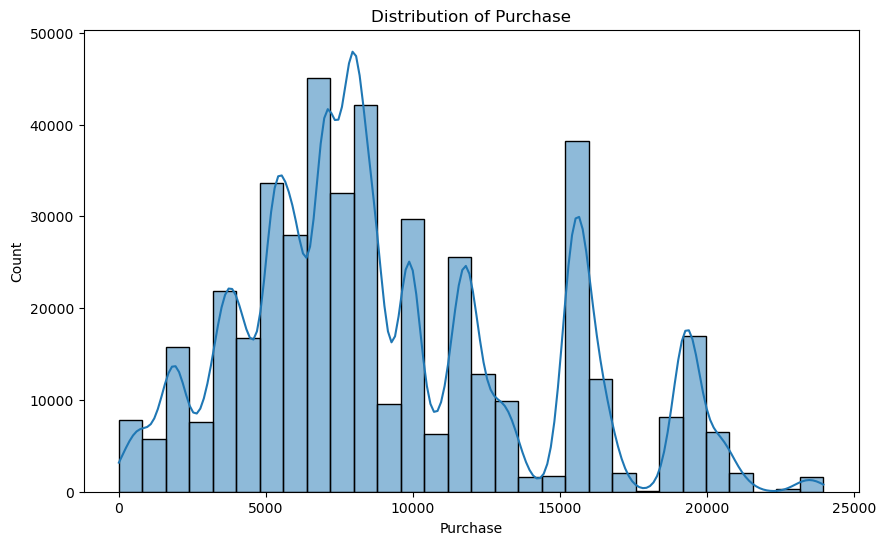

In [13]:
# Plotting "Purchase" distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase')
plt.show()

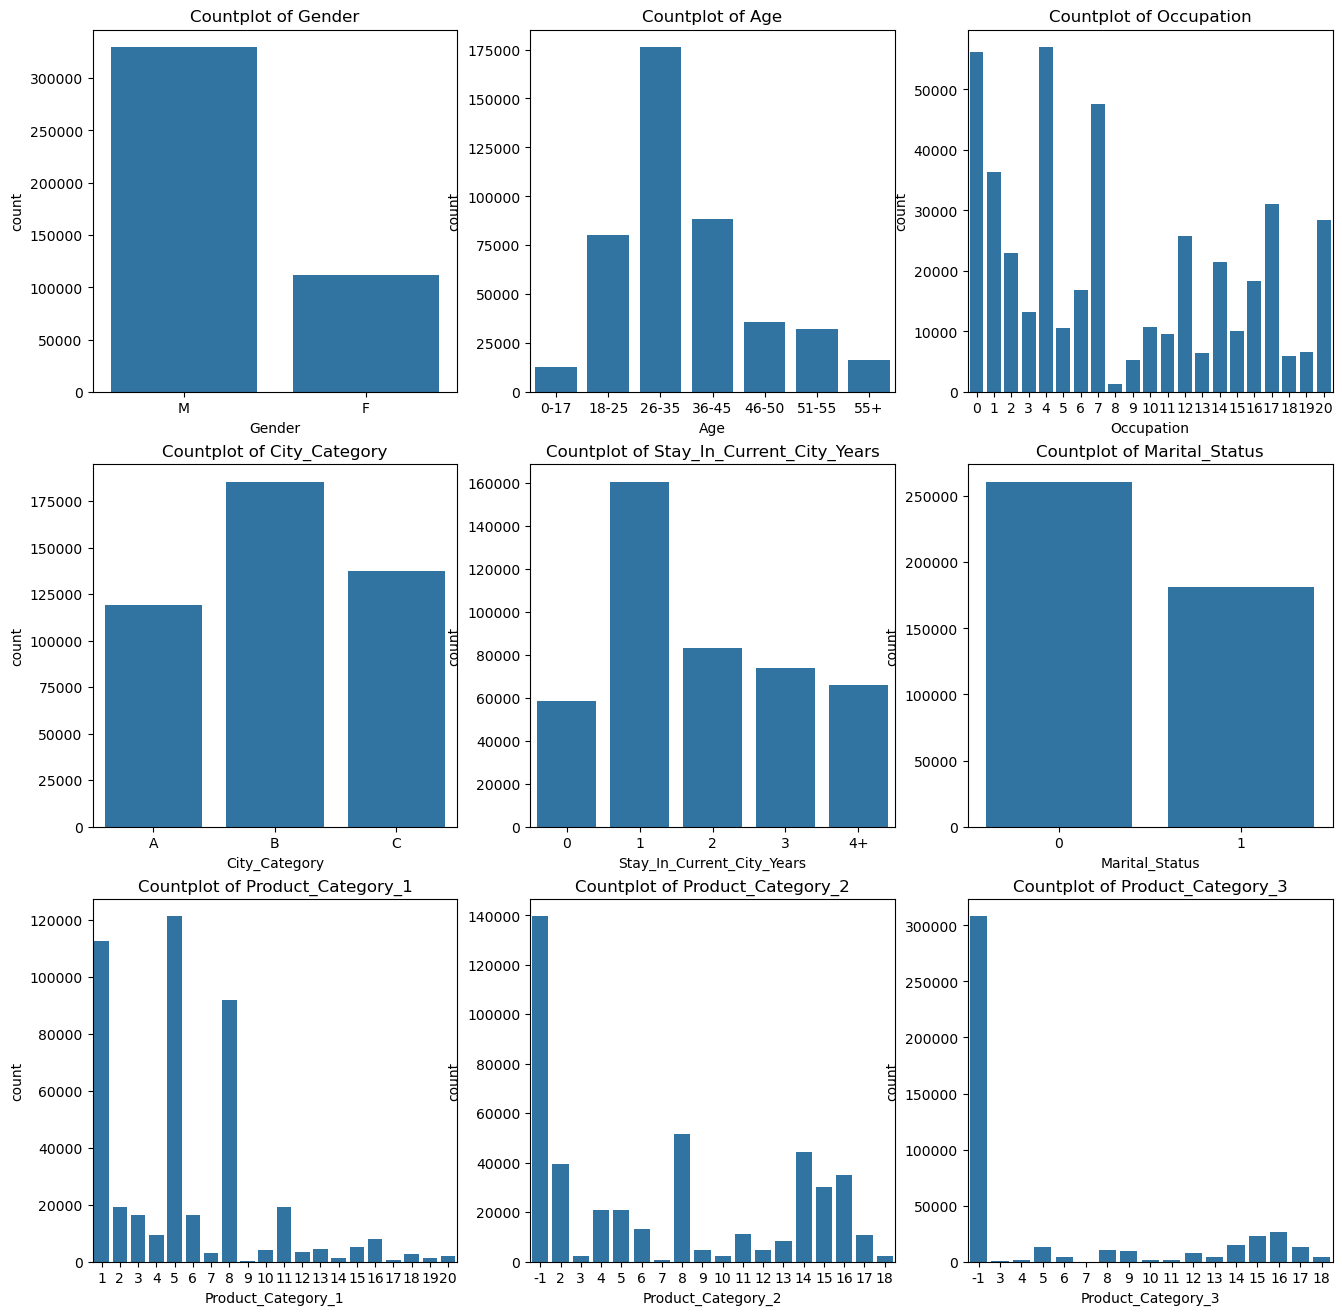

In [14]:
# Plotting count for each categorical variable

orders = [['M', 'F'],
          ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
          range(21),
          ['A', 'B', 'C'],
          ['0', '1', '2', '3', '4+'],
          [0, 1],
          range(1, 21),
          [-1] + list(range(2, 19)),
          [-1] + list(range(3, 19))]

fig, axs = plt.subplots(3, 3, figsize=(16,16))
for i, col in enumerate(['Gender', 'Age', 'Occupation',
            'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
            'Product_Category_1', 'Product_Category_2', 'Product_Category_3']):
    ax = axs[i//3, i%3]
    sns.countplot(x=col, data=df, ax=ax, order=orders[i])
    ax.title.set_text(f'Countplot of {col}')
plt.show()

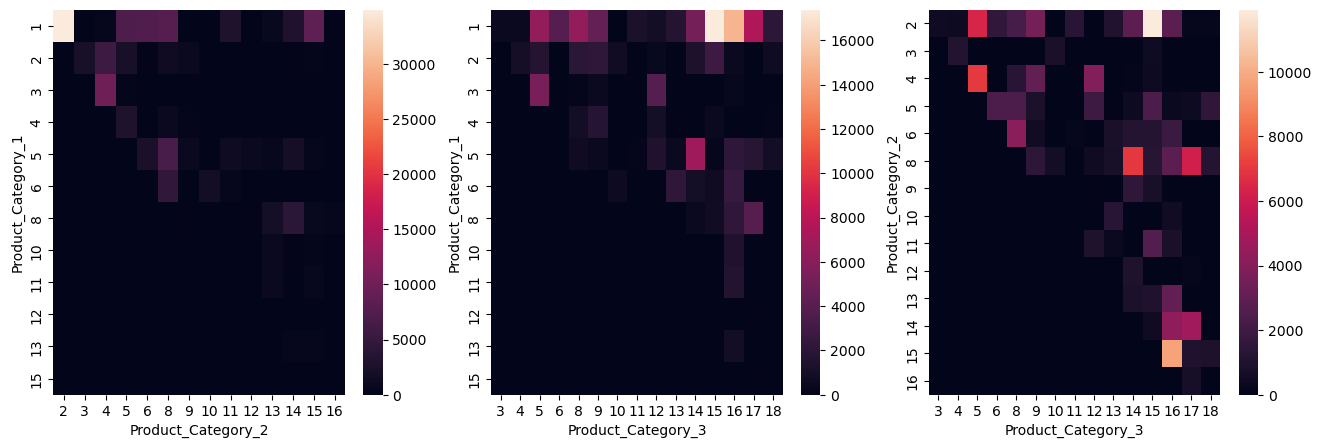

In [15]:
# Heatmap of Product Categories

fig, axs = plt.subplots(1, 3, figsize=(16,5))
mask = (df['Product_Category_3'] != -1) | ((df['Product_Category_3'] != -1))
sns.heatmap(df[mask].groupby(['Product_Category_1', 'Product_Category_2']).size().unstack(fill_value=0), ax=axs[0])
sns.heatmap(df[mask].groupby(['Product_Category_1', 'Product_Category_3']).size().unstack(fill_value=0), ax=axs[1])
sns.heatmap(df[mask].groupby(['Product_Category_2', 'Product_Category_3']).size().unstack(fill_value=0), ax=axs[2])
plt.show()

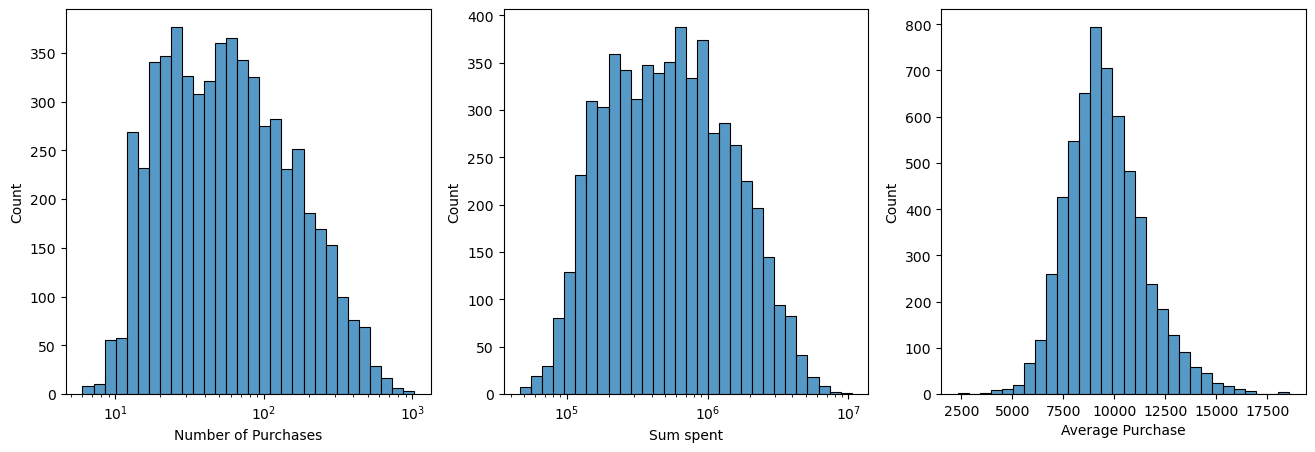

In [16]:
# Plotting "Number of Purchases", "Sum spent" and "Average Purchase" by user
## "Number of Purchases" and "Sum spent" plots are in log-scale

fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.histplot(x=users['Number of Purchases'], bins=30, ax=axs[0], log_scale=True)#, hue=users['Age'], multiple='stack')
sns.histplot(x=users['Sum spent'], bins=30, ax=axs[1], log_scale=True)#, hue=users['Age'], multiple='stack')
sns.histplot(x=users['Average Purchase'], bins=30, ax=axs[2])#, hue=users['Age'], multiple='stack')
plt.show()

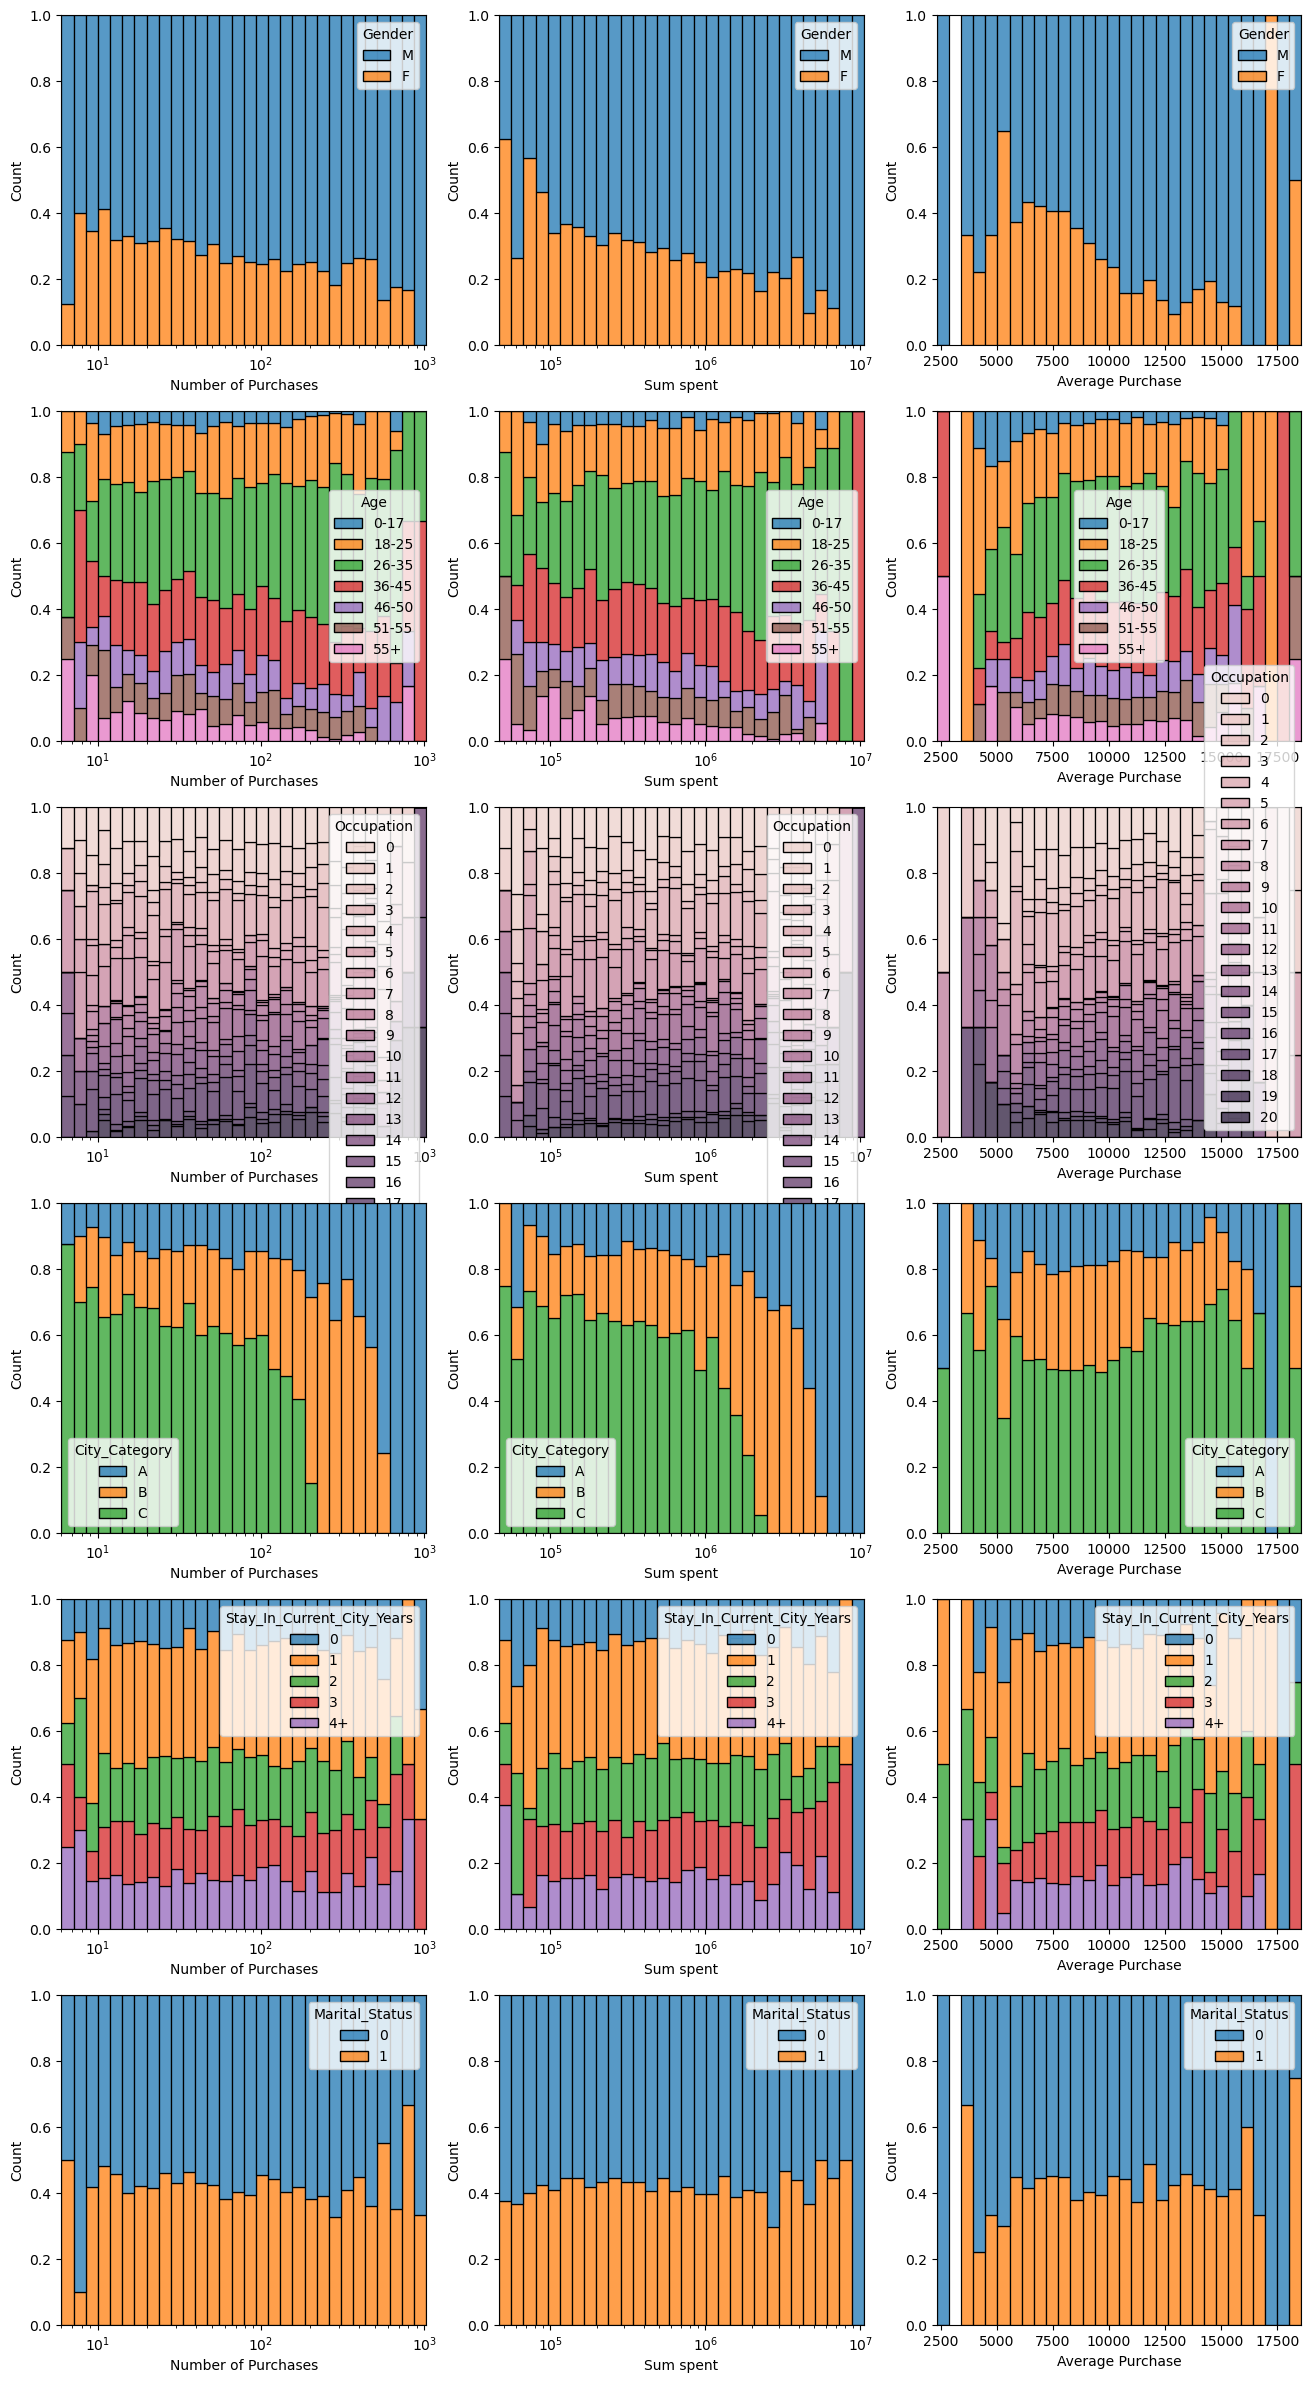

In [17]:
# Plotting "Number of Purchases", "Sum spent" and "Average Purchase" by user charcteristics
## "Number of Purchases" and "Sum spent" plots are in log-scale
## histograms are filled to see the percentage of each group in each bin

fig, axs = plt.subplots(6, 3, figsize=(16,30))
for i,col in enumerate(['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']):
    sns.histplot(x=users['Number of Purchases'], bins=30, ax=axs[i, 0], log_scale=True, hue=users[col], multiple='fill', hue_order=orders[i])
    sns.histplot(x=users['Sum spent'], bins=30, ax=axs[i, 1], log_scale=True, hue=users[col], multiple='fill', hue_order=orders[i])
    sns.histplot(x=users['Average Purchase'], bins=30, ax=axs[i, 2], hue=users[col], multiple='fill', hue_order=orders[i])
plt.show()

In [18]:
# Grouping by product ("Product_ID")

prods = Demo2.eda.group_by_product(df)
prods

,Product_Category_1,Number of Purchases,Sum spent,Unitary Price
Product_ID,,,,
P00025442,1,1312,22837010,17406.257622
P00110742,1,1283,21326433,16622.317225
P00255842,16,1103,20070184,18195.996374
P00059442,6,1154,19957844,17294.492201
P00112142,1,1278,19864377,15543.330986
...,...,...,...,...
P00281342,11,1,1609,1609.000000
P00353042,11,1,1545,1545.000000
P00063242,13,2,962,481.000000


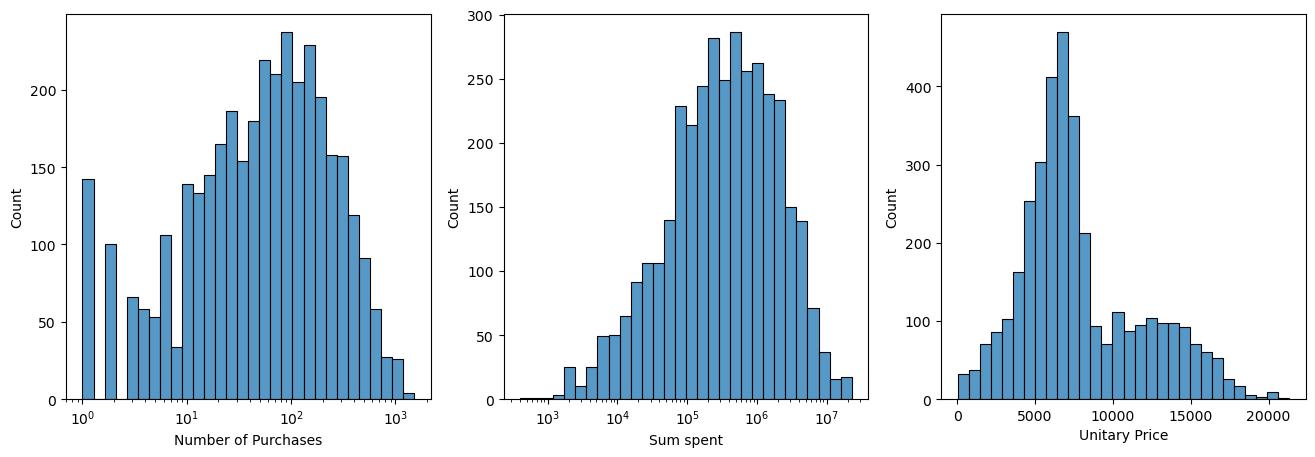

In [19]:
# Plotting "Number of Purchases", "Sum spent" and "Unitary Price" by product
## "Number of Purchases" and "Sum spent" plots are in log-scale

fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.histplot(x=prods['Number of Purchases'], bins=30, ax=axs[0], log_scale=True)#, hue=prods['Product_Category_1'], multiple='stack')
sns.histplot(x=prods['Sum spent'], bins=30, ax=axs[1], log_scale=True)#, hue=prods['Product_Category_1'], multiple='stack')
sns.histplot(x=prods['Unitary Price'], bins=30, ax=axs[2])#, hue=prods['Product_Category_1'], multiple='stack')
plt.show()

In [20]:
# Grouping by product category ("Product_Category_1")

prods_cat = Demo2.eda.group_by_product_category(df)
prods_cat

,Number of Purchases,Sum spent,Average Price
Product_Category_1,,,
1,112633,1535757040,13635.054025
5,121165,756192449,6241.013898
8,91691,687833781,7501.649900
6,16509,261189641,15821.045551
2,19171,216173151,11276.049815
3,16344,165230339,10109.541055
16,7949,117422607,14771.997358
11,19290,90698878,4701.859927
10,4145,81665547,19702.182630


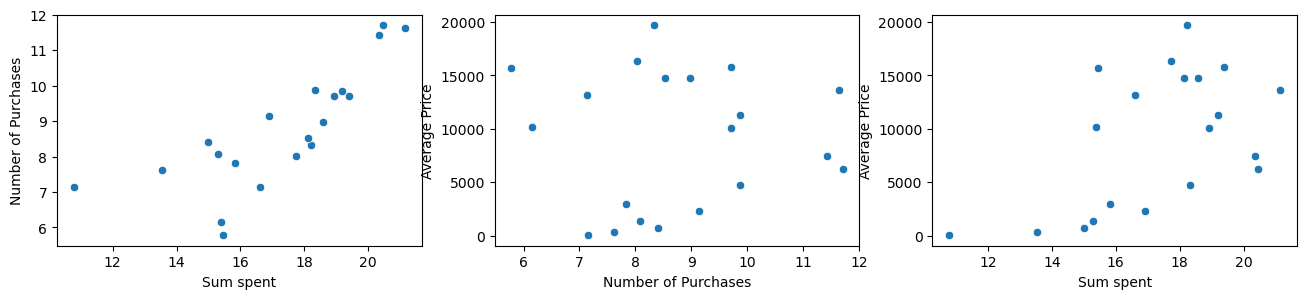

In [21]:
# Plotting "Number of Purchases", "Sum spent" and "Average Price" by product category
## "Number of Purchases" and "Sum spent" plots are in log-scale

fig, axs = plt.subplots(1, 3, figsize=(16,3))
sns.scatterplot(x=np.log(prods_cat['Sum spent']), y=np.log(prods_cat['Number of Purchases']), ax=axs[0])
sns.scatterplot(x=np.log(prods_cat['Number of Purchases']), y='Average Price', data=prods_cat, ax=axs[1])
sns.scatterplot(x=np.log(prods_cat['Sum spent']), y='Average Price', data=prods_cat, ax=axs[2])
plt.show()

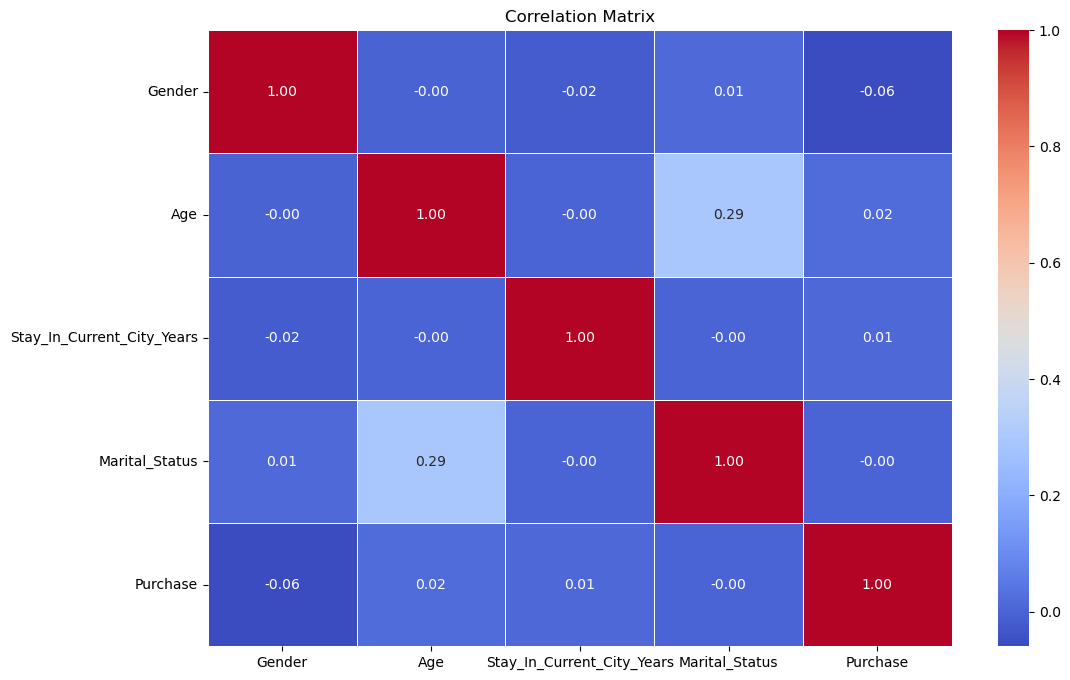

In [22]:
# Studing correlation between variables

df_numerical = deepcopy(df)
df_numerical = df_numerical[['Gender', 'Age', 'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase']]

df_numerical['Gender'] = [0 if x=='M' else 1 for x in df_numerical['Gender']]
df_numerical['Age'] = ['55-95' if x=='55+' else x for x in df_numerical['Age']]
df_numerical['Age'] = [np.mean([int(x.split('-')[0]), int(x.split('-')[-1])])for x in df_numerical['Age']]
df_numerical['Stay_In_Current_City_Years'] = [int(x[:-1]) if x=='4+' else int(x) for x in df_numerical['Stay_In_Current_City_Years']]

correlation_matrix = df_numerical.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Grouping by user category ("Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status")

user_groups = Demo2.eda.group_by_user_category(users)
user_groups

Numerosity  \
Gender Age   Occupation City_Category Stay_In_Current_City_Years Marital_Status               
M      18-25 4          B             1                          0                       30   
                                      4+                         0                       22   
       26-35 7          A             1                          0                       15   
             0          B             1                          0                       14   
       18-25 4          B             2                          0                       16   
...                                                                                     ...   
F      51-55 16         C             2                          0                        1   
       46-50 2          C             2                          0                        1   
M      18-25 2          B             2                          1                        1   
F      18-25 10         C             4+                         0                        1   
       55+   14         C             3                          1                        1   

                                                                                 log_Numerosity  \
Gender Age   Occupation City_Category Stay_In_Current_City_Years Marital_Status                   
M      18-25 4          B             1                          0                     3.401197   
                                      4+                         0                     3.091042   
       26-35 7          A             1                          0                     2.708050   
             0          B             1                          0                     2.639057   
       18-25 4          B             2                          0                     2.772589   
...                                                                                         ...   
F      51-55 16         C             2                          0                     0.000000   
       46-50 2          C             2                          0                     0.000000   
M      18-25 2          B             2                          1                     0.000000   
F      18-25 10         C             4+                         0                     0.000000   
       55+   14         C             3                          1                     0.000000   

                                                                                 Sum spent  \
Gender Age   Occupation City_Category Stay_In_Current_City_Years Marital_Status              
M      18-25 4          B             1                          0                35068606   
                                      4+                         0                29542132   
       26-35 7          A             1                          0                25726307   
             0          B             1                          0                23745027   
       18-25 4          B             2                          0                21728229   
...                                                                                    ...   
F      51-55 16         C             2                          0                   62753   
       46-50 2          C             2                          0                   62250   
M      18-25 2          B             2                          1                   57805   
F      18-25 10         C             4+                         0                   53996   
       55+   14         C             3                          1                   52371   

                                                                                 log_SumSpent  \
Gender Age   Occupation City_Category Stay_In_Current_City_Years Marital_Status                 
M      18-25 4          B             1                          0                  17.372817   
                                      4+   

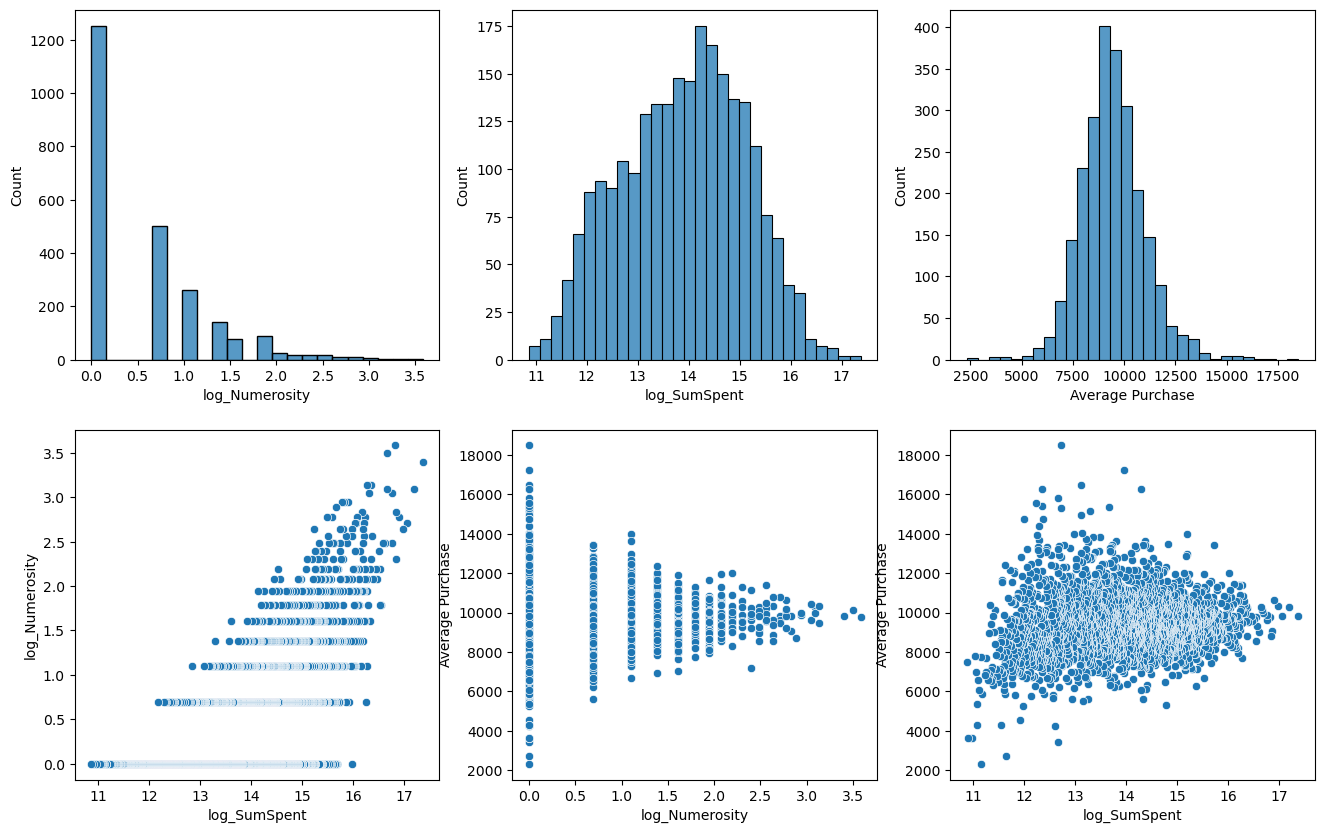

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(16,10))
sns.histplot(x=user_groups['log_Numerosity'], bins='auto', ax=axs[0,0])
sns.histplot(x=user_groups['log_SumSpent'], bins=30, ax=axs[0,1])
sns.histplot(x=user_groups['Average Purchase'], bins=30, ax=axs[0,2])
sns.scatterplot(x='log_SumSpent', y='log_Numerosity', data=user_groups, ax=axs[1,0])
sns.scatterplot(x='log_Numerosity', y='Average Purchase', data=user_groups, ax=axs[1,1])
sns.scatterplot(x='log_SumSpent', y='Average Purchase', data=user_groups, ax=axs[1,2])
plt.show()

# Saving data

In [25]:
try:
   os.makedirs("../tmp")
except FileExistsError:
   # directory already exists
   pass

In [26]:
users_train.to_csv('../tmp/users_train.csv')
users_test.to_csv('../tmp/users_test.csv')